<a href="https://colab.research.google.com/github/RuthvikKatta/Hand-Written-digits-Recognisation/blob/main/MiniProject_ML_20911A3594.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model For Recognising Hand Written Digits

Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#To Split the Data into Training and Testing 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

#Dataset of Hand Written Digits that is Present in Sklearn Datasets
from sklearn.datasets import load_digits

Digits Dataset (load_digits) .This Dataset is PreLoaded in the Scikit Learn Package's Dataset .This dataset Contains 1797 digit Images which are grayscale Values of each cell in a digit Image.

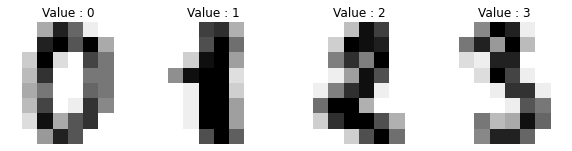

In [ ]:
digits = load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Value : %i" % label)

Data of a single Digit .The values Represent the grayscale value of that particular cell .Each Image is of size (8x8)

In [ ]:
print(digits.images[0])
print("Digit is : ",digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Digit is :  0


Flattening the Images into an One Dimensional Array .Here Flattening the 2D dataset into 1D Array gives an array of size 64.

In [ ]:
samples = len(digits.images)
data = digits.images.reshape(samples,-1)
print(data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Importing Classifier : Support Vector Machine

I Used Support Vector Machine Classifier because it classifies the New Instance More Accurately and using SVM classifier for Digit Classification gives more Accuracy.

In [ ]:
# importing Classifier
from sklearn.svm import SVC
svc_clf = SVC(kernel="rbf",gamma=0.001)

Splitting Data into Training and Testing. And also training the Model

In [ ]:
#Splitting dataset in Training and Testing Datasets
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.3,shuffle=False)

#Training the Machine
svc_clf.fit(X_train,y_train)

predicted = svc_clf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {svc_clf}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




Accuracy of Model After Training with 70% of Dataset is  :  "97 percent" 

Confusion Matrix of SVM Classifier

Text(0.5, 0.98, 'Confusion Matrix')

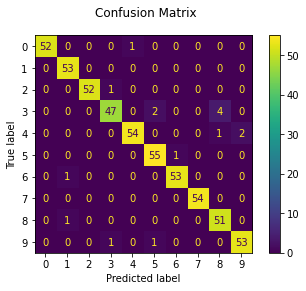

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Confusion Matrix")

Prediction of test Dataset(X_test) by Trained Model

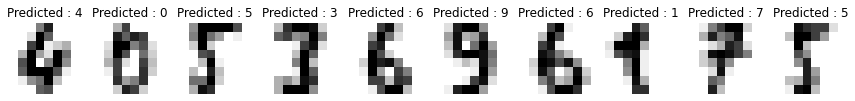

In [ ]:
images = []
for i in X_test:
    images.append(i.reshape(8,8))
predicted = svc_clf.predict(X_test)
_, axes = plt.subplots(nrows=1,ncols=10,figsize=(15,5))
for ax, image, label in zip(axes, images, predicted ):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Predicted : %i" % label)

In [ ]:
print("Predicted Values By Machine : ",predicted[:10])
print("Original Values of Iamges : ",y_test[:10])

Predicted Values By Machine :  [4 0 5 3 6 9 6 1 7 5]
Original Values of Iamges :  [4 0 5 3 6 9 6 1 7 5]


In [ ]:
count=0
print("Training Dataset : 70% and Test Dataset : 30%")
print("Total Number of Test Images : ",len(X_test))
for i,j in zip(predicted,y_test):
    if i!=j:
        count+=1
print("Number of Wrongly Predicted Images : ",count)
print("Accuracy : ",(1-(count/len(X_test)))*100)

Training Dataset : 70% and Test Dataset : 30%
Total Number of Test Images :  540
Number of Wrongly Predicted Images :  16
Accuracy :  97.03703703703704


Trainnig Model with different Lengths of Training and Testing Dataset

1. Training = 60% and Testing  = 40%
2. Training = 50% and Testing  = 50%
3. Training = 80% and Testing  = 20%

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.4,shuffle=False)

#Training the Machine
svc_clf.fit(X_train,y_train)

predicted = svc_clf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {svc_clf}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.99      0.96      0.97        73
           2       0.99      0.97      0.98        71
           3       0.97      0.84      0.90        74
           4       0.99      0.96      0.97        74
           5       0.95      0.99      0.97        71
           6       0.99      0.99      0.99        74
           7       0.95      1.00      0.97        72
           8       0.92      1.00      0.96        68
           9       0.95      0.97      0.96        71

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.96       719
weighted avg       0.97      0.97      0.96       719




In [ ]:
count=0
print("Training Dataset : 60% and Test Dataset : 40%")
print("Total Number of Test Images : ",len(X_test))
for i,j in zip(predicted,y_test):
    if i!=j:
        count+=1
print("Number of Wrongly Predicted Images : ",count)
print("Accuracy : ",(1-(count/len(X_test)))*100)

Training Dataset : 60% and Test Dataset : 40%
Total Number of Test Images :  719
Number of Wrongly Predicted Images :  25
Accuracy :  96.52294853963839


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)

#Training the Machine
svc_clf.fit(X_train,y_train)

predicted = svc_clf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {svc_clf}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [ ]:
count=0
print("Training Dataset : 50% and Test Dataset : 50%")
print("Total Number of Test Images : ",len(X_test))
for i,j in zip(predicted,y_test):
    if i!=j:
        count+=1
print("Number of Wrongly Predicted Images : ",count)
print("Accuracy : ",(1-(count/len(X_test)))*100)

Training Dataset : 50% and Test Dataset : 50%
Total Number of Test Images :  899
Number of Wrongly Predicted Images :  28
Accuracy :  96.88542825361512


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)

#Training the Machine
svc_clf.fit(X_train,y_train)

predicted = svc_clf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {svc_clf}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




In [ ]:
count=0
print("Training Dataset : 80% and Test Dataset : 20% (OverFit Condition)")
print("Total Number of Test Images : ",len(X_test))
for i,j in zip(predicted,y_test):
    if i!=j:
        count+=1
print("Number of Wrongly Predicted Images : ",count)
print("Accuracy : ",(1-(count/len(X_test)))*100)

Training Dataset : 80% and Test Dataset : 20% (OverFit Condition)
Total Number of Test Images :  360
Number of Wrongly Predicted Images :  15
Accuracy :  95.83333333333334


Conclusion : 

After Training the SVM Classifier with load_digits() Dataset with different ratios of length of Training and Testing Data .The Highest Accuracy Obtained is 97.03% and The least Accuracy Obtained is 95.83% which is overfit Condition